In [1]:
import numpy as np
import pandas as pd
import random
random.seed(53)

In [2]:
data = pd.read_csv('tweets.csv')
data.head(5)

,id,author,status
0,1,Donald J. Trump,I will be making a major statement from the @W...
1,2,Donald J. Trump,Just arrived at #ASEAN50 in the Philippines fo...
2,3,Donald J. Trump,"After my tour of Asia, all Countries dealing w..."
3,4,Donald J. Trump,Great to see @RandPaul looking well and back o...
4,5,Donald J. Trump,Excited to be heading home to see the House pa...


In [3]:
data.shape

(400, 3)

Justin Trudeau     200
Donald J. Trump    200
Name: author, dtype: int64

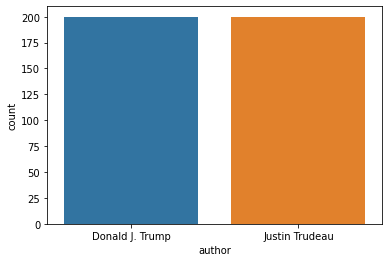

In [4]:
import seaborn as sns
sns.countplot(x='author',data=data)
#plt.show()
data['author'].value_counts()

In [5]:
X = data['status']
y = data['author']
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.33,random_state=53)

In [6]:
xtrain

357    Canadians send their condolences to those affe...
256    We’re making progress on the TPP – and working...
175    Ed Gillespie will turn the really bad Virginia...
228    Nous sommes arrivés aux Philippines pour assis...
152    Today is National Prescription Drug Take Back ...
                             ...                        
189    MAKE AMERICA GREAT AGAIN! https://t.co/CbEwJSQ1A3
251    Le premier ministre @TurnbullMalcolm et moi av...
373    RT @NANComms: Meegwetch @JustinTrudeau @janeph...
285    #TBT to a backpacking trip in Vietnam many yea...
25     Throughout my travels, I've had the pleasure o...
Name: status, Length: 268, dtype: object

In [7]:
ytrain

357     Justin Trudeau
256     Justin Trudeau
175    Donald J. Trump
228     Justin Trudeau
152    Donald J. Trump
            ...       
189    Donald J. Trump
251     Justin Trudeau
373     Justin Trudeau
285     Justin Trudeau
25     Donald J. Trump
Name: author, Length: 268, dtype: object

In [8]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
# Initialize tfidf vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.9, min_df=0.05)

# Create tfidf train and test variables
tfidf_train = tfidf_vectorizer.fit_transform(xtrain)
tfidf_test = tfidf_vectorizer.transform(xtest)
# Create a MulitnomialNB model
tfidf_nb = MultinomialNB()
tfidf_nb.fit(tfidf_train, ytrain)

# Run predict on your TF-IDF test data to get your predictions
tfidf_nb_pred = tfidf_nb.predict(tfidf_test)

# Calculate the accuracy of your predictions
tfidf_nb_score = metrics.accuracy_score(tfidf_nb_pred, ytest)
print("Accuracy Score:",tfidf_nb_score)

Accuracy Score: 0.803030303030303


In [12]:
from sklearn.feature_extraction.text import CountVectorizer
# Initialize count vectorizer
count_vectorizer = CountVectorizer(stop_words='english', max_df=0.9, min_df=0.05)

# Create count train and test variables
count_train = count_vectorizer.fit_transform(xtrain)
count_test = count_vectorizer.transform(xtest)
# Create a MulitnomialNB model
count_nb = MultinomialNB()
count_nb.fit(count_train, ytrain)

# Run predict on your count test data to get your predictions
count_nb_pred = count_nb.predict(count_test)

# Calculate the accuracy of your predictions
count_nb_score = metrics.accuracy_score(count_nb_pred, ytest)
print("Accuracy score:",count_nb_score)

Accuracy score: 0.7954545454545454


In [13]:
%matplotlib inline

#from datasets.helper_functions import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
print("Confusion Matrix for tfidf:","\n",confusion_matrix(ytest,tfidf_nb_pred))

Confusion Matrix for tfidf: 
 [[56  2]
 [24 50]]


In [14]:
print("Confusion Matrix for count:","\n",confusion_matrix(ytest,count_nb_pred))

Confusion Matrix for count: 
 [[56  2]
 [25 49]]


In [16]:

trump_tweet = 'fake news'
trudeau_tweet = 'canada'

# Vectorize each tweet using the TF-IDF vectorizer's transform method
trump_tweet_vectorized = tfidf_vectorizer.transform([trump_tweet])
trudeau_tweet_vectorized = tfidf_vectorizer.transform([trudeau_tweet])

# Call the predict method on your vectorized tweets
trump_tweet_pred = tfidf_nb.predict(trump_tweet_vectorized)
trudeau_tweet_pred = tfidf_nb.predict(trudeau_tweet_vectorized)

print("Predicted Trump tweet", trump_tweet_pred)
print("Predicted Trudeau tweet", trudeau_tweet_pred)

Predicted Trump tweet ['Donald J. Trump']
Predicted Trudeau tweet ['Justin Trudeau']
